 # Phase 0 – Prétraitement & Exploration du Dataset

Objectif : Nettoyer, visualiser et comprendre notre jeu de données pour bien structurer le pipeline.

## 0.1. Charger les bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Charger le dataset

### Dictionnaire des colonnes du dataset "Women's Clothing E-Commerce Reviews"

| Colonne                   | Description |
|---------------------------|-------------|
| `Clothing ID`             | Identifiant unique de l’article évalué. Utile pour grouper les avis, mais non essentiel pour le fine-tuning sur texte. |
| `Age`                     | Âge de la cliente ayant rédigé l’avis. Peu pertinent pour l’analyse de sentiment basée sur le texte. |
| `Title`                   | Titre bref de l’avis. Peut être fusionné avec `Review Text` pour enrichir le contexte. |
| `Review Text`             | Texte principal de l’avis. C’est la donnée clé pour l'entraînement du modèle Transformer. |
| `Rating`                  | Note (1 à 5) attribuée par la cliente. Peut être utilisée comme label global de sentiment. |
| `Recommended IND`         | 1 si le produit est recommandé, 0 sinon. Label binaire de satisfaction générale. |
| `Positive Feedback Count` | Nombre de personnes ayant trouvé l’avis utile. Peut refléter la qualité perçue du commentaire, mais rarement utilisé en NLP. |
| `Division Name`           | Catégorie large de produit (ex. *General Petite*, *Intimates*). |
| `Department Name`         | Catégorie plus précise (ex. *Tops*, *Dresses*). |
| `Class Name`              | Catégorie fine (ex. *Blouses*, *Pants*). Potentiellement utile si on souhaite filtrer par type de produit. |


In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 0.3. Aperçu des colonnes et informations générales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe(include="all")

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,11742.500000,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,6779.968547,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5871.250000,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,11742.500000,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,17613.750000,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

## 0.4. Supprimer les colonnes inutiles

Certaines colonnes ne sont pas utiles pour notre tâche de fine-tuning des Transformers sur l’analyse des sentiments. Voici les colonnes supprimées et les raisons :

- `Unnamed: 0` : Colonne d’index inutile.
- `Clothing ID` : Identifiant numérique sans intérêt sémantique.
- `Age` : Non représentatif du contenu textuel.
- `Positive Feedback Count` : Mesure sociale, non utilisée dans l’analyse du langage.
- `Division Name`, `Department Name`, `Class Name` : Catégories produits ; supprimées ici pour se concentrer uniquement sur le texte des avis clients.


In [ ]:
df.drop(columns=['Unnamed: 0','Clothing ID','Age','Positive Feedback Count','Division Name','Department Name','Class Name'], inplace=True)

In [ ]:
df

,Title,Review Text,Rating,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


## 0.5. Détecter et supprimer les doublons

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

840


## 0.6. Détection et traitement des valeurs manquantes

In [ ]:
df.isnull().sum()

,0
Title,2974
Review Text,10
Rating,0
Recommended IND,0


In [ ]:
# Supprimer les lignes où Title ET Review Text sont tous les deux manquants
# "how='all'" signifie qu'on ne supprime la ligne QUE si TOUTES les colonnes du subset sont nulles
# "how='any'" supprimerait la ligne si AU MOINS UNE des colonnes est nulle
# Remarque : si le subset contient UNE SEULE colonne, l’argument how devient inutile car il n’y a qu’un seul champ à tester
df.dropna(subset=["Title", "Review Text"], how="all", inplace = True)
print(f"Nombre de lignes après suppression : {len(df)}")

Nombre de lignes après suppression : 22637


In [ ]:
df.isnull().sum()

,0
Title,2965
Review Text,1
Rating,0
Recommended IND,0


In [ ]:
df["Full Review"] = df["Title"].fillna("")+". "+df["Review Text"].fillna("")
df[["Title", "Review Text", "Full Review"]].head()

,Title,Review Text,Full Review
0,NaN,Absolutely wonderful - silky and sexy and comf...,. Absolutely wonderful - silky and sexy and co...
1,NaN,Love this dress! it's sooo pretty. i happene...,. Love this dress! it's sooo pretty. i happe...
2,Some major design flaws,I had such high hopes for this dress and reall...,Some major design flaws. I had such high hopes...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...","My favorite buy!. I love, love, love this jump..."
4,Flattering shirt,This shirt is very flattering to all due to th...,Flattering shirt. This shirt is very flatterin...


## 0.7. Réduire la taille du dataset pour prototypage (30%)

In [ ]:
df_sample = df.sample(frac=0.3, random_state=42) #30% du dataset initial

## 0.8. Visualisations

### Nombre d’avis par rating

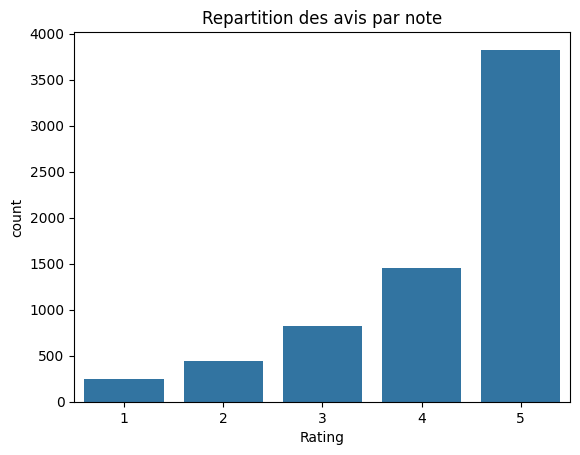

In [ ]:
sns.countplot(x= "Rating", data= df_sample)
plt.title("Repartition des avis par note")
plt.show()

### Longueur des commentaires

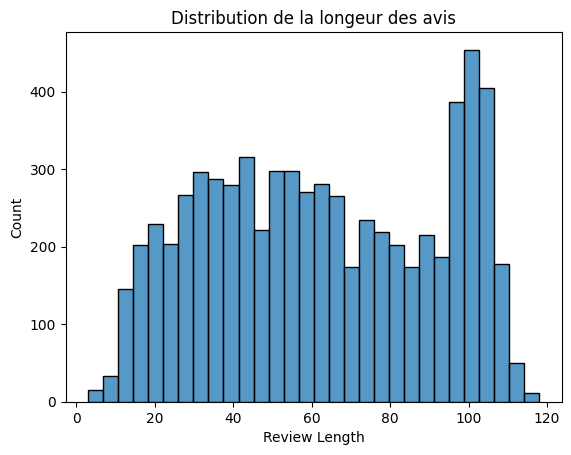

In [ ]:
df_sample["Review Length"] = df_sample["Full Review"].apply( lambda x : len(str(x).split()))
sns.histplot(df_sample["Review Length"], bins=30)
plt.title("Distribution de la longeur des avis")
plt.show()

### Représentation du sentiment global

<ipython-input-16-5d7c4e5f5fa5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment', data = df_sample, palette= "pastel")


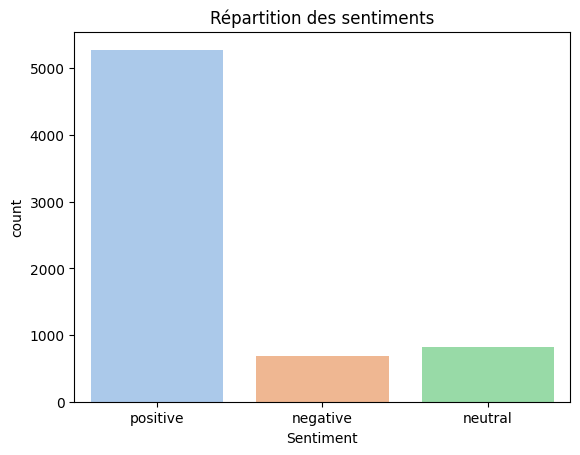

In [ ]:
df_sample["Sentiment"] = df_sample["Rating"].apply( lambda x : 'positive' if x > 3 else( 'neutral' if x==3 else 'negative'))

sns.countplot(x = 'Sentiment', data = df_sample, palette= "pastel")
plt.title("Répartition des sentiments")
plt.show()

# Phase 1 – Préparation de l’environnement & extraction d’un échantillon pour prototypage

Objectif général :
Préparer un environnement de travail propre, limiter la taille des données pour un entraînement rapide, et garantir la reproductibilité du pipeline.

##  1.1 – Pourquoi limiter le dataset ?

| Raisons             | Détail |
|---------------------|--------|
|**Temps d'exécution** | Un modèle fine-tuné sur plusieurs milliers de lignes prend du temps à s'entraîner. |
| **Prototype rapide**   | Travailler sur un échantillon maîtrisé (ex. 5 000 avis) permet d’itérer plus rapidement. |
|**Validation d’idée**  | Ce que tu valides sur un sous-ensemble, tu pourras ensuite l’étendre à l’ensemble du jeu de données. |


##  1.2 – Échantillonnage du dataset

In [ ]:
# On fixe une graine pour que le tirage au sort soit reproductible
RANDOM_SEED = 42

# On définit la taille cible de l'échantillon (par exemple, 5000 lignes)
N = 5000

# On échantillonne aléatoirement sans remplacement
df_sampled = df.sample(n=N, random_state=RANDOM_SEED).reset_index(drop=True)

# Vérification
print(f"Nombre de lignes dans l’échantillon : {len(df_sampled)}")
df_sampled.head()


Nombre de lignes dans l’échantillon : 5000


,Title,Review Text,Rating,Recommended IND,Full Review
0,Lovely,This dress is beautiful. the neckline is not t...,5,1,Lovely. This dress is beautiful. the neckline ...
1,NaN,Runs true to size but some details were not as...,4,1,. Runs true to size but some details were not ...
2,Feminine alternative to your shapeless puffer,I am obsessed with peplum down coats because t...,4,1,Feminine alternative to your shapeless puffer....
3,Great purchase,Love the style and fit. great buy! my legs are...,4,1,Great purchase. Love the style and fit. great ...
4,NaN,Great winter maxi. soft and comfortable fabric...,5,1,. Great winter maxi. soft and comfortable fabr...


### Méthode `reset_index(drop=True)`

Lorsqu’on utilise `sample()` pour extraire un sous-ensemble du dataset, les index d’origine sont conservés (ex : 83, 1054, 2099).  
La méthode `reset_index()` permet de **réinitialiser l’index** pour avoir des lignes numérotées de 0 à N-1.

- Par défaut, l’ancien index est conservé sous forme de colonne.
- En ajoutant **`drop=True`**, on **supprime cette colonne** inutile.
- En appelant `.reset_index(drop=True)` **directement après le sampling**, on évite d’avoir à faire cette opération dans une cellule séparée.


## 1.4 – Sauvegarde de l’échantillon (optionnelle)

In [ ]:
df_sampled.to_csv("sampled_reviews.csv",index=False)

# Phase 2 – Création des étiquettes de sentiment global (pseudo-labels)

Objectif : Créer une colonne `Sentiment`pour associer à chaque avis un sentiment global (`positive`, `neutral`, `negative`) à partir de la note (`Rating`) donnée dans le dataset.

## 2.1 – Pourquoi créer ces labels ?

Le dataset de base n'est pas annoté avec les sentiments associés à chaque aspect.  
Afin de démarrer l'entraînement d'un premier modèle, nous allons utiliser une **approximation basée sur la colonne `Rating`** :

| Rating | Sentiment approximatif |
|--------|-------------------------|
| 1 ou 2 | `negative`              |
| 3      | `neutral`               |
| 4 ou 5 | `positive`              |

> 💡 Il ne s'agit pas d'une annotation parfaite, mais d'une **estimation raisonnable** qui permet de poser les premières briques du prototype.

Ce signal faible nous aidera à valider l'ensemble du pipeline dans un premier temps, avant d’explorer d'autres méthodes d’annotation aspect par aspect dans les phases suivantes.


## 2.2 – Code pour créer les labels

In [ ]:
def map_rating_to_sentiment(rating):
    if rating > 3:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df_sampled["Sentiment"] = df_sampled["Rating"].apply(map_rating_to_sentiment)

df_sampled[["Rating", "Sentiment"]].head(10)

,Rating,Sentiment
0,5,positive
1,4,positive
2,4,positive
3,4,positive
4,5,positive
5,2,negative
6,3,neutral
7,3,neutral
8,5,positive
9,4,positive


## 2.3 – Visualiser la répartition des sentiments

<ipython-input-20-99f2403e08e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Sentiment", data=df_sampled, palette="pastel")


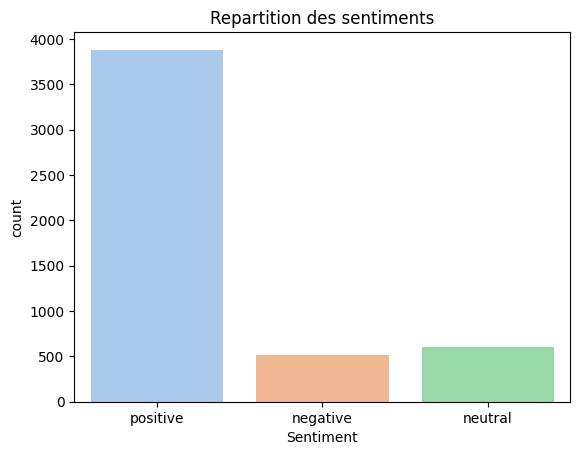

In [ ]:
sns.countplot(x = "Sentiment", data=df_sampled, palette="pastel")
plt.title("Repartition des sentiments")
plt.show()

# Phase 3 — Extraction des Aspects avec SpaCy

Objectif :
Identifier automatiquement, pour chaque avis, les aspects abordés par la cliente (ex. fit, material, style, customer service). Ces aspects serviront de base pour analyser les sentiments dans les étapes futures.

## 3.1. Installer et charger le modèle SpaCy

Dans cette étape, nous utilisons **spaCy**, une bibliothèque puissante de *traitement automatique du langage naturel* (NLP), très efficace pour extraire des informations à partir de textes, comme des groupes nominaux (*noun chunks*), des entités nommées ou des dépendances syntaxiques.

La commande suivante :

```python
import spacy
nlp = spacy.load("en_core_web_sm")
```

effectue deux actions importantes :

- `import spacy` : elle importe la bibliothèque spaCy pour que l’on puisse l’utiliser dans le notebook.
- `nlp = spacy.load("en_core_web_sm")` : elle charge un modèle pré-entraîné de langue anglaise.

Décomposons le nom de ce modèle :

- `en` = anglais  
- `core` = modèle standard  
- `web` = entraîné sur des données issues du web (avis, forums, etc.)  
- `sm` = *small*, c’est un modèle léger, rapide à exécuter, mais suffisamment précis pour nos besoins actuels (comme l'extraction des aspects dans des avis clients)

Ce modèle permet d’appliquer l’analyse linguistique à chaque texte : découpage en phrases, identification de groupes de mots (*noun chunks*), reconnaissance des parties du discours (noms, verbes, adjectifs…), etc.

*C’est une étape clé pour la suite du projet, car c’est grâce à ce modèle que nous pourrons extraire automatiquement les aspects discutés par les clients dans leurs avis.*


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

## 3.2. Extraire les groupes nominaux (noun chunks)


### Pourquoi utiliser `.text` pour extraire les aspects ?

Lorsque nous appliquons `nlp(x)` à un texte, spaCy retourne un objet `Doc` contenant de nombreuses informations linguistiques. L’attribut `.noun_chunks` permet de parcourir les **groupes nominaux** (aspects potentiels) du texte, chacun représenté par un objet `Span`.

Pour extraire le texte brut de chaque `Span`, on utilise **`.text`**, qui est l’attribut propre de spaCy pour cela.

Bien que `str(chunk)` fonctionne aussi (car `Span` redéfinit `__str__()`), il est recommandé d’utiliser `.text` pour plus de **clarté, lisibilité et propreté du code**.

#### Exemple :

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("The fit was terrible but the fabric is nice.")
for chunk in doc.noun_chunks:
    print(chunk, "→", chunk.text, "→", str(chunk))


The fit → The fit → The fit
the fabric → the fabric → the fabric


In [ ]:
# Pour chaque avis (chaîne de caractères), spaCy crée un objet Doc contenant l’analyse linguistique complète.
# Parmi les informations disponibles, nous extrayons ici les "noun chunks" (groupes nominaux), typiquement associés aux aspects.
# Chaque chunk est converti en minuscules pour normaliser le texte.
# Résultat : une liste d’aspects détectés dans chaque avis (ex : ['the blouse', 'the fit', 'the color']).
df_sampled['aspects'] = df_sampled["Full Review"].apply( lambda x: [chunck.text.lower() for chunck in nlp(x).noun_chunks])

## 3.4. Évaluer la diversité des aspects extraits

In [ ]:
from collections import Counter

# df["aspects"] est une colonne de listes d’aspects pour chaque avis.
# Exemple : ["fit", "fabric", "color"]

# On commence par aplatir toutes les listes d’aspects du DataFrame en une seule grande liste
all_aspects = [aspect for aspects in df_sampled["aspects"] for aspect in aspects]
# La ligne ci-dessus signifie :
# Pour chaque ligne de df["aspects"], qui est une liste appelée "aspects"
# On parcourt chacun des éléments dans cette liste (appelés "aspect")
# Et on les ajoute tous dans une seule grande liste à plat.
# Autrement dit : on passe d'une "liste de listes" à une "liste simple"

#On crée un compteur d’occurrences pour chaque aspect (chaîne de caractères)
aspect_counter = Counter(all_aspects)

# On affiche les 20 aspects les plus fréquents
aspect_counter.most_common(20)

[('i', 14538),
 ('it', 10992),
 ('this', 1989),
 ('me', 1508),
 ('you', 1362),
 ('they', 1233),
 ('this dress', 1083),
 ('that', 1039),
 ('this top', 654),
 ('them', 593),
 ('which', 558),
 ('the fabric', 530),
 ('the dress', 445),
 ('these', 403),
 ('a size', 348),
 ('the material', 307),
 ('the color', 305),
 ('the fit', 296),
 ('the top', 277),
 ('the back', 272)]

## 3.5 Problème soulevé

Certains "aspects" extraits automatiquement par spaCy sont trop génériques, non informatifs ou hors-sujet (ex. "I", "this", "that"). Cela vient du fait que noun_chunks capture tous les groupes nominaux, même s’ils n’ont aucun intérêt sémantique pour notre tâche.

In [ ]:
# Liste d’aspects à exclure : pronoms, déterminants, etc.
stop_aspects = {"i", "this", "that", "it", "they", "you", "we", "he", "she", "one", "someone", "something", "thing"}

def filter_aspects(aspects_list):
  return [asp for asp in aspects_list if asp not in stop_aspects and len(asp.split())>1]

df_sampled['Filtered_aspects'] = df_sampled["aspects"].apply(filter_aspects)

df_sampled["Filtered_aspects"].head()

,Filtered_aspects
0,"[this dress, the neckline, the straps, a norma..."
1,"[some details, the slit, one side, the look, s..."
2,"[feminine alternative, your shapeless puffer, ..."
3,"[great purchase, the style, great buy, my legs..."
4,"[great winter maxi, soft and comfortable fabri..."


Nous réévaluons ici la diversité des aspects extraits, cette fois après l’application du filtre destiné à éliminer les termes non informatifs

In [ ]:
all_aspects = [aspect for aspects in df_sampled["Filtered_aspects"] for aspect in aspects]
# La ligne ci-dessus signifie :
# Pour chaque ligne de df["aspects"], qui est une liste appelée "aspects"
# On parcourt chacun des éléments dans cette liste (appelés "aspect")
# Et on les ajoute tous dans une seule grande liste à plat.
# Autrement dit : on passe d'une "liste de listes" à une "liste simple"

#On crée un compteur d’occurrences pour chaque aspect (chaîne de caractères)
aspect_counter = Counter(all_aspects)

# On affiche les 20 aspects les plus fréquents
aspect_counter.most_common(20)

[('this dress', 1083),
 ('this top', 654),
 ('the fabric', 530),
 ('the dress', 445),
 ('a size', 348),
 ('the material', 307),
 ('the color', 305),
 ('the fit', 296),
 ('the top', 277),
 ('the back', 272),
 ('the model', 261),
 ('this shirt', 249),
 ('the store', 240),
 ('the length', 218),
 ('this one', 218),
 ('this sweater', 212),
 ('the waist', 210),
 ('the colors', 183),
 ('the sleeves', 180),
 ('the front', 164)]

# Phase 4 — Segmentation du texte par aspect

**Objectif :**
Associer chaque *aspect* identifié à une ou plusieurs *phrases* spécifiques de l’avis où il est mentionné. Cela permettra ensuite de déterminer un **sentiment par aspect**, et non seulement un sentiment global.


## 4.1. Découper chaque avis en phrases

###  Pourquoi découper en phrases ?
Découper les avis en phrases permet d’analyser précisément **où** chaque aspect est mentionné.
Cela rend possible une attribution de sentiment beaucoup plus fine (et plus juste).
```

Dans cette étape, nous avons besoin de **segmenter chaque avis client en phrases distinctes**, afin de pouvoir associer chaque *aspect* à la ou les phrases dans lesquelles il apparaît.

Pour cela, nous utilisons les outils suivants :

- **`nltk`** (*Natural Language Toolkit*) : une bibliothèque spécialisée dans le traitement du langage naturel (NLP), offrant des fonctions robustes pour le découpage de texte, la tokenisation, l’étiquetage grammatical, etc.
- **`punkt`** : un modèle pré-entraîné de `nltk`, qui permet de **reconnaître les frontières de phrases** à partir de la ponctuation.
- **`sent_tokenize()`** : une fonction qui transforme un avis (chaîne de caractères) en une **liste de phrases**.

Exemple :

```python
sent_tokenize("The dress is beautiful. The material feels cheap.")
# ➜ ['The dress is beautiful.', 'The material feels cheap.']


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- ce fichier est parfois requis
nltk.download('tokenizers/punkt')  # téléchargement du tokenizer complet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Error loading tokenizers/punkt: Package 'tokenizers/punkt'
[nltk_data]     not found in index


False

In [ ]:
from nltk.tokenize import sent_tokenize
df_sampled['sentences'] = df_sampled['Full Review'].apply(sent_tokenize)

## 4.2. Associer chaque aspect à la ou les phrases qui le contiennent

In [ ]:
df_sampled.columns

Index(['Title', 'Review Text', 'Rating', 'Recommended IND', 'Full Review',
       'Sentiment', 'aspects', 'Filtered_aspects', 'sentences'],
      dtype='object')

In [ ]:
def get_aspect_sentences(row):
  asp_sent_map=[]
  for asp in (row['Filtered_aspects']):
    for sent in (row['sentences']):
      if asp in sent.lower():
        asp_sent_map.append({
            'aspect': asp,
            'sentence': sent,
            'review_id': row.name
        })

  return asp_sent_map
# Attention : il est crucial d'ajouter axis=1 dans apply()
# Par défaut, Pandas applique la fonction ligne par ligne avec axis=0 (colonne par colonne).
# Ici, on souhaite appliquer la fonction à CHAQUE LIGNE (chaque avis), pas à chaque colonne,
# donc on utilise axis=1 pour que 'row' représente une ligne du DataFrame (avec toutes ses colonnes).

aspect_sentence_pairs = df_sampled.apply(get_aspect_sentences, axis=1)
aspect_sentence_pairs.head()

,0
0,"[{'aspect': 'this dress', 'sentence': 'This dr..."
1,"[{'aspect': 'some details', 'sentence': 'Runs ..."
2,"[{'aspect': 'feminine alternative', 'sentence'..."
3,"[{'aspect': 'great purchase', 'sentence': 'Gre..."
4,"[{'aspect': 'great winter maxi', 'sentence': '..."


## 4.3. Structurer et visualiser les résultats obtenus

### Pourquoi cette étape est cruciale ?
Elle permet de préparer le futur dataset d’entraînement du modèle. Pour chaque (aspect, phrase), nous pourrons bientôt attribuer un *sentiment* (positif, négatif ou neutre).

Exemple attendu :

| aspect | sentence                    | review_id |
|--------|-----------------------------|-----------|
| fit    | The fit was perfect!        | 202       |
| color  | I hated the faded color...  | 219       |
```

In [ ]:
from itertools import chain
triplets = list(chain.from_iterable(aspect_sentence_pairs))

df_aspect_sent = pd.DataFrame(triplets)

df_aspect_sent_samp = df_aspect_sent.sample(10, random_state=1)

df_aspect_sent_samp

,aspect,sentence,review_id
18465,my knees,i'm petite and curvy and so the hem lands clos...,2152
15340,this dress,I got this dress on sale (under 20 dollars) bu...,1794
22361,the straps,i don't have the right bra so i just pinned th...,2614
39807,the point,it's incredibly sheer - you'd have to wear a c...,4614
32198,this dress,Completely in love with this dress!,3758
30197,weird neck fit,Weird neck fit.,3532
24217,the length,the sleeves are not too tight on me and i love...,2812
20799,the shoulders,"2nd, the shoulders are too tight (design--not ...",2429
1764,oh and the neck line ads,oh and the neck line ads that extra touch of s...,202
12601,the waist,"i am 4'11 and ordered the petite 4, which is a...",1484


# Phase 5 — Attribution automatique du sentiment par aspect

**Objectif :**
Donner un **sentiment** (positif, neutre ou négatif) pour chaque **aspect identifié**, en s’appuyant sur les phrases correspondantes extraites à l’étape précédente.

Deux options méthodologiques s’offrent à nous :


## 5.1. Option A – Méthode baseline avec modèle Hugging Face pré-entraîné

## Analyse de sentiment globale (DistilBERT SST-2) avec accélération GPU – Hugging Face

Dans cette cellule, nous utilisons le modèle pré-entraîné `distilbert-base-uncased-finetuned-sst-2-english` pour effectuer une analyse de sentiment **binaire** (positive/negative) sur une liste de phrases, en **mode batch** et avec **accélération GPU** si disponible.

---

### 1. Import et création du pipeline
```python
from transformers import pipeline

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=0,        # GPU si disponible, CPU sinon
    batch_size=32    # Nombre de phrases traitées simultanément
)
```
- `pipeline(...)` est une fonction utilitaire de la bibliothèque Hugging Face Transformers permettant de charger facilement un modèle pré-entraîné sur une tâche précise.
- `device=0` indique que l’on souhaite utiliser le **GPU** (indice 0). Si aucun GPU n’est disponible, le pipeline bascule automatiquement sur la **CPU**.
- `batch_size=32` améliore les performances en traitant 32 phrases à la fois.

Le modèle utilisé ici est :
```
distilbert-base-uncased-finetuned-sst-2-english
```
Ce modèle a été entraîné sur le dataset SST-2 pour effectuer une classification **globale** du sentiment d'une phrase :  
Il prédit **soit "POSITIVE" soit "NEGATIVE"**, sans tenir compte d’un **aspect spécifique**.

---

### 2. Extraction des phrases à analyser
```python
sentences = df_aspect_sent["sentence"].tolist()
```
On extrait toutes les phrases de la colonne `"sentence"` du DataFrame et on les convertit en une **liste Python simple**, prête à être traitée par lots.

---

### 3. Prédiction du sentiment (batch)
```python
results = sentiment_analyzer(sentences)
```
Le pipeline prédit le **sentiment global** pour chaque phrase.  
Le résultat est une **liste de dictionnaires**, chaque dictionnaire contenant deux clés :

```python
{'label': 'POSITIVE' or 'NEGATIVE', 'score': ...}
```

---

### 4. Post-traitement des résultats
```python
sentiments = [res["label"].lower() for res in results]
```
On extrait uniquement le label (`"POSITIVE"` ou `"NEGATIVE"`) et on le convertit en **minuscules** pour faciliter les comparaisons (`"positive"`, `"negative"`).

---

### 5. Intégration dans la DataFrame
```python
df_aspect_sent["sentiment"] = sentiments
```
Les sentiments prédits sont ajoutés dans une nouvelle colonne du DataFrame appelée `"sentiment"`.

---

### 6. Affichage des résultats
```python
df_aspect_sent.head()
```
Affiche les premières lignes de la DataFrame, permettant de visualiser les phrases analysées et les sentiments associés.

---

### Limites et remarques importantes

Ce modèle ne fait **aucune analyse par aspect**. Il évalue la **phrase entière** comme étant **positive ou négative**.

#### Exemple :
```python
"The fit is terrible but I love the material."
```
Résultat du modèle : `NEGATIVE`  
Mais en vérité :

- *fit* → négatif  
- *material* → positif

Ainsi, cette méthode est utile pour obtenir un **aperçu rapide et global**, mais reste **limitée** lorsque les phrases contiennent plusieurs opinions ou des jugements contrastés.

---

### Bon à savoir

- Le pipeline Hugging Face retourne toujours une **liste**, même pour une seule phrase.
- Il est donc essentiel d’accéder au premier élément avec `[0]` si on traite des phrases une à une.
- L’argument `device` ne fonctionnera que si un environnement compatible GPU est disponible (par exemple sur Google Colab avec GPU activé).


In [ ]:
df_aspect_sent.columns

Index(['aspect', 'sentence', 'review_id'], dtype='object')

In [ ]:
from transformers import pipeline

# Chargement du pipeline avec batch_size et device GPU si dispo
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=0,             # 0 = utilise le GPU (si dispo)
    batch_size=32         # Ajuste ce nombre selon ta RAM dispo
)

# Liste de phrases
sentences = df_aspect_sent["sentence"].tolist()

# Prédictions en batch
results = sentiment_analyzer(sentences)

# Extraction des labels seulement, en minuscules
sentiments = [res["label"].lower() for res in results]

# Ajout à la DataFrame
df_aspect_sent["sentiment"] = sentiments

# Affichage
df_aspect_sent.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


,aspect,sentence,review_id,sentiment
0,this dress,This dress is beautiful.,0,positive
1,the neckline,the neckline is not too low and the straps are...,0,positive
2,the straps,the neckline is not too low and the straps are...,0,positive
3,a normal bra,the neckline is not too low and the straps are...,0,positive
4,the waist,the waist is very flattering and the ruffle at...,0,negative


###  Pourquoi cette approche de baseline ?
Elle permet une **évaluation automatique rapide**, sans annotation manuelle, à l’aide d’un modèle robuste et prêt à l’emploi disponible sur 🤗 Hugging Face (ici, DistilBERT).

Cependant, le modèle ne connaît pas l’aspect ciblé : il évalue **le sentiment global de la phrase**, ce qui peut introduire des erreurs si plusieurs aspects sont présents.

## 5.2. Option B – Génération des labels par prompting avec GPT

### Analyse de la fonction GPT

```python
import pandas as pd
from openai import OpenAI, OpenAIError
```
 **Importation des bibliothèques** :
- `pandas` pour manipuler les données tabulaires.
- `OpenAI` pour interagir avec l’API ChatGPT.
- `OpenAIError` permet de capturer les erreurs lors des appels API.

---

```python
client = OpenAI(api_key="sk-...")
```
**Authentification** : Création du client OpenAI avec votre clé API. Cette clé donne accès au modèle GPT-3.5-turbo.

---

```python
df_cp = df_asp_sent_sample.copy()
df_cp['sentiment_gpt'] = None
```
**Préparation des données** :
- `df_cp` est une copie de l’échantillon de données.
- Une nouvelle colonne `sentiment_gpt` est ajoutée et initialisée à `None`.

---

```python
def get_sentiment_gpt(aspect, sentence):
    try:
        aspect_clean = aspect.encode('utf-8', errors='ignore').decode()
        sentence_clean = sentence.encode('utf-8', errors='ignore').decode()
```
**Nettoyage du texte** : Encodage/décodage UTF-8 pour éviter les erreurs liées aux caractères spéciaux.

```python
        prompt = f"In the sentence: '{sentence_clean}', what is the sentiment towards '{aspect_clean}'? Respond with Positive, Negative, or Neutral."
```
**Prompt personnalisé** : Formulation explicite de la tâche envoyée à GPT.

```python
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0
        )
```
**Appel API** :
- Envoie la requête au modèle GPT avec le prompt.
- `temperature=0.0` garantit une réponse déterministe (même entrée → même sortie).

```python
        return response.choices[0].message.content.strip()
```
**Extraction de la réponse** : On récupère la réponse textuelle nettoyée.

```python
    except OpenAIError as e:
        print(f"[ERROR] {e}")
        return None
```
**Gestion des erreurs** : Si l’appel échoue, on affiche l’erreur et retourne `None`.

---

```python
batch_size = 50
output_file = "gpt_annotations_progress.csv"
```
**Paramètres de configuration** :
- `batch_size` détermine la taille des groupes de données à traiter.
- `output_file` désigne le fichier CSV où les résultats seront enregistrés.

---

```python
for i in range(0, len(df_cp), batch_size):
    batch = df_cp.iloc[i:i+batch_size].copy()
    print(f"🔄 Traitement du batch {i} à {i+batch_size - 1}")
```
**Itération par lots** :
- Divise le dataset en blocs de `batch_size`.
- Affiche le batch actuellement en traitement.

```python
    for idx, row in batch.iterrows():
        if pd.isna(row['sentiment_gpt']):
            sentiment = get_sentiment_gpt(row['aspect'], row['sentence'])
            df_cp.at[idx, 'sentiment_gpt'] = sentiment
            time.sleep(1.2)
```
**Application de GPT à chaque ligne** :
- Si le champ `sentiment_gpt` est vide, on appelle la fonction `get_sentiment_gpt()`.
- `time.sleep(1.2)` ajoute un délai pour éviter de dépasser les limites de requêtes API.

```python
    df_cp.to_csv(output_file, index=False)
    print(f"✅ Batch {i} sauvegardé")
```
**Sauvegarde intermédiaire** :
- Le fichier CSV est mis à jour après chaque batch pour éviter toute perte de données.

```python
print("🎉 Annotation terminée.")
```
**Fin du processus** : Indique que tous les batches ont été traités avec succès.

---

*Ce traitement par lots est indispensable pour manipuler des volumes élevés tout en respectant les contraintes de l’API OpenAI.*




In [ ]:
len(df_aspect_sent)

43096

In [ ]:
df_asp_sent_sample = df_aspect_sent.sample(1000, random_state=42)

In [ ]:
import time
import pandas as pd
from openai import OpenAI, OpenAIError

# Authentification
client = OpenAI(api_key="MY_API_KEY_HERE") 

# Données de départ (extraites par exemple à 5000 lignes)
df_cp = df_asp_sent_sample.copy()
df_cp['sentiment_gpt'] = None  # Nouvelle colonne à remplir

# Fonction robuste avec gestion d’erreur
def get_sentiment_gpt(aspect, sentence):
    try:
        aspect_clean = aspect.encode('utf-8', errors='ignore').decode()
        sentence_clean = sentence.encode('utf-8', errors='ignore').decode()
        prompt = f"In the sentence: '{sentence_clean}', what is the sentiment towards '{aspect_clean}'? Respond with Positive, Negative, or Neutral."

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0
        )
        return response.choices[0].message.content.strip()

    except OpenAIError as e:
        print(f"[ERROR] {e}")
        return None

# Traitement par batchs
batch_size = 50
output_file = "gpt_annotations_progress.csv"

for i in range(0, len(df_cp), batch_size):
    batch = df_cp.iloc[i:i+batch_size].copy()

    print(f"🔄 Traitement du batch {i} à {i+batch_size - 1}")

    for idx, row in batch.iterrows():
        if pd.isna(row['sentiment_gpt']):
            sentiment = get_sentiment_gpt(row['aspect'], row['sentence'])
            df_cp.at[idx, 'sentiment_gpt'] = sentiment
            time.sleep(1.2)  # Délai pour éviter surcharge API

    # Sauvegarde intermédiaire
    df_cp.to_csv(output_file, index=False)
    print(f"✅ Batch {i} sauvegardé")

print("🎉 Annotation terminée.")


🔄 Traitement du batch 0 à 49
✅ Batch 0 sauvegardé
🔄 Traitement du batch 50 à 99
✅ Batch 50 sauvegardé
🔄 Traitement du batch 100 à 149
✅ Batch 100 sauvegardé
🔄 Traitement du batch 150 à 199
✅ Batch 150 sauvegardé
🔄 Traitement du batch 200 à 249
✅ Batch 200 sauvegardé
🔄 Traitement du batch 250 à 299
✅ Batch 250 sauvegardé
🔄 Traitement du batch 300 à 349
✅ Batch 300 sauvegardé
🔄 Traitement du batch 350 à 399
✅ Batch 350 sauvegardé
🔄 Traitement du batch 400 à 449
✅ Batch 400 sauvegardé
🔄 Traitement du batch 450 à 499
✅ Batch 450 sauvegardé
🔄 Traitement du batch 500 à 549
✅ Batch 500 sauvegardé
🔄 Traitement du batch 550 à 599
✅ Batch 550 sauvegardé
🔄 Traitement du batch 600 à 649
✅ Batch 600 sauvegardé
🔄 Traitement du batch 650 à 699
✅ Batch 650 sauvegardé
🔄 Traitement du batch 700 à 749
✅ Batch 700 sauvegardé
🔄 Traitement du batch 750 à 799
✅ Batch 750 sauvegardé
🔄 Traitement du batch 800 à 849
✅ Batch 800 sauvegardé
🔄 Traitement du batch 850 à 899
✅ Batch 850 sauvegardé
🔄 Traitement du ba

### Pourquoi utiliser GPT ?
Contrairement à la baseline, GPT **comprend le contexte spécifique à un aspect donné**, car l’aspect est **explicitement fourni dans le prompt**.

Exemple :
```python
sentence = "The fit is terrible but I love the material."
aspect = "fit"
```
GPT comprend que la question concerne uniquement "fit" ➜ Réponse : "Negative"

Cette méthode est donc **plus précise** que les modèles globaux, surtout pour les phrases contenant plusieurs opinions.

### GPT vs Claude (Anthropic)
| Critère          | GPT                        | Claude (Anthropic)        |
|------------------|----------------------------|----------------------------|
| Précision         | Très haute (aspect ciblé)  | Bonne, mais moins personnalisable |
| Coût              | Payant à l’usage (OpenAI)   | Payant à l’usage (Anthropic) |
| Facilité d’usage  | API bien documentée        | Moins répandue pour l’instant |
| Prompting libre   | Oui, très souple           | Oui                         |
| Intégration Python| Directe via openai         | Moins d’exemples en Python  |

**GPT a été préféré ici** pour sa **documentation riche**, sa **communauté active**, et une meilleure intégration Python (notamment avec `openai.ChatCompletion`).

## 5.3. Visualiser quelques prédictions

In [ ]:
df_asp_sent_sample["sentiment gpt"]= df_cp['sentiment_gpt']
df_asp_sent_sample.head()

,aspect,sentence,review_id,sentiment,sentiment gpt
9606,a night,Perfect for work or a night out.,1130,positive,Positive
17016,great design,Great design.,1985,positive,Positive
16186,the waist,they were also loose in the waist and overall ...,1888,negative,Neutral
33441,a pretty top,i am a size 12/14 & purchased the size l. i co...,3890,positive,Positive
38785,a really pretty shirt,This is a really pretty shirt - the colors are...,4495,positive,Positive


## 5.4. Sauvegarder les données annotées

In [ ]:
import os
output_path = "aspect_sentiment_labeled.csv"
df_asp_sent_sample.to_csv(output_path, index=False)

# Phase 6 — Construction du dataset final pour l'entraînement ABSA

**Objectif :**
Structurer les données extraites et annotées afin qu’elles puissent être utilisées directement pour l'entraînement d’un modèle de type BERT (ou autre Transformer) sur la tâche **ABSA** (Aspect-Based Sentiment Analysis).


## 6.1. Format final visé (triplet JSON ou CSV)

Nous allons créer un dataset contenant les colonnes suivantes :
- `text` : la phrase complète
- `aspect` : l’aspect identifié dans cette phrase
- `label` : le sentiment associé à cet aspect dans cette phrase (`positive`, `negative`, `neutral`)

In [ ]:
df_final = df_cp[['sentence', 'aspect', 'sentiment_gpt']].copy()
absa_dataset= df_final.rename(columns={
    'sentence': 'text',
    'aspect' : 'aspect',
    'sentiment_gpt' : 'label'
    })
absa_dataset.reset_index(drop=True, inplace=True)

absa_dataset.head()

,text,aspect,label
0,Perfect for work or a night out.,a night,Positive
1,Great design.,great design,Positive
2,they were also loose in the waist and overall ...,the waist,Neutral
3,i am a size 12/14 & purchased the size l. i co...,a pretty top,Positive
4,This is a really pretty shirt - the colors are...,a really pretty shirt,Positive


### Pourquoi ce format ?

C’est le format minimal nécessaire pour un entraînement efficace :
- Une **phrase contextuelle** (le `text`)
- Un **aspect à évaluer**
- Une **étiquette de sentiment** associée à cet aspect

Ce format est utilisé pour entraîner des modèles BERT avec des architectures de type "[CLS] aspect [SEP] phrase [SEP]".

## 6.2. Export en fichier `.csv` ou `.json`

### Pourquoi exporter dans ces deux formats ?

- **CSV** ➜ plus simple à visualiser, compatible avec beaucoup d’outils
- **JSONL** ➜ recommandé pour les modèles Transformers Hugging Face et les APIs modernes

In [ ]:
# Export CSV (entraînement avec sklearn, fastText, ou BERT personnalisé)
absa_dataset.to_csv('absa_dataset.csv', index=False)

# Optionnel : export JSONL (entraînement avec des librairies comme Hugging Face Datasets)
absa_dataset.to_json('absa_dataset.json', orient='records' , lines =True)

### Export du dataset au format JSONL

```python
absa_dataset.to_json("absa_dataset.json", orient="records", lines=True)
```

Cette commande exporte le DataFrame `absa_dataset` en fichier `.jsonl` (JSON Lines), un format recommandé pour l'entraînement de modèles NLP, notamment avec Hugging Face.

- **"absa_dataset.json"** : nom du fichier de sortie.
- **orient="records"** : chaque ligne du fichier correspond à un dictionnaire Python `{clé: valeur}`.
- **lines=True** : chaque enregistrement est écrit sur une seule ligne, ce qui produit un fichier lisible ligne par ligne.

### Exemple de sortie :
```json
{"text": "The fit was terrible", "aspect": "fit", "label": "negative"}
```

Ce format est adapté à l'entraînement de modèles capables de prédire le **sentiment associé à un aspect précis** dans une phrase.


## 6.3. Construction des entrées pour BERT directement

Pour les modèles comme BERT, on peut préparer les entrées sous forme :
```
[CLS] aspect [SEP] phrase [SEP]
```

In [ ]:
absa_dataset['input_text'] = absa_dataset.apply(
    lambda row: f"[CLS] {row['aspect']} [SEP] {row['text']} [SEP]", axis=1
)

absa_dataset[["input_text", "label"]].head()

,input_text,label
0,[CLS] a night [SEP] Perfect for work or a nigh...,Positive
1,[CLS] great design [SEP] Great design. [SEP],Positive
2,[CLS] the waist [SEP] they were also loose in ...,Neutral
3,[CLS] a pretty top [SEP] i am a size 12/14 & p...,Positive
4,[CLS] a really pretty shirt [SEP] This is a re...,Positive


### Pourquoi cette structure ?

Les modèles BERT sont entraînés sur des séquences délimitées par des tokens spéciaux :
- `[CLS]` ➜ début de séquence (utilisé pour la classification)
- `[SEP]` ➜ séparation entre le *query* (aspect) et le *context* (phrase)

Cette structure permet au modèle de concentrer son attention sur l’aspect en question.

## 6.4. Sauvegarde finale du dataset enrichi

In [ ]:
absa_dataset.to_csv("absa_dataset_bert_ready.csv", index=False)
absa_dataset.to_json("absa_dataset_bert_ready.json", orient="records", lines=True)

### Ce fichier est prêt pour un fine-tuning immédiat

Il peut être utilisé dans un script PyTorch, Keras ou via la bibliothèque `transformers` de Hugging Face pour entraîner un modèle à reconnaître le **sentiment d’un aspect donné** dans une phrase donnée.
```